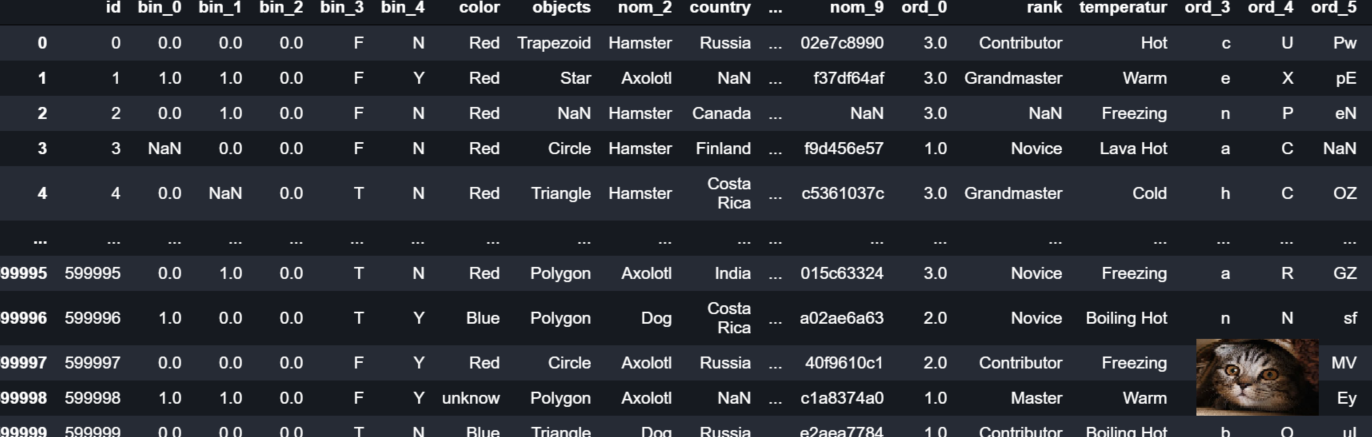

# Disclaimer! This kernel is only for educational purposes and made for fun therefor the content of the kernel should not be taken to seriously

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#grafs
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Importing data

In [ ]:
import pandas as pd
sample_submission = pd.read_csv("../input/cat-in-the-dat-ii/sample_submission.csv")
test = pd.read_csv("../input/cat-in-the-dat-ii/test.csv")
train = pd.read_csv("../input/cat-in-the-dat-ii/train.csv")

# Viewing data

In [ ]:
train.head()

In [ ]:
train.head()

In [ ]:
test.describe()


In [ ]:
test.head()

In [ ]:
import missingno as msno
msno.matrix(train)
msno.matrix(test)

In [ ]:
train.isnull().sum()


In [ ]:
test.isnull().sum()

# Features

Target

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(train.target)

height = sum([p.get_height() for p in ax.patches])
for p in ax.patches:
        ax.annotate(f'{100*p.get_height()/height:.2f} %', (p.get_x()+0.3, p.get_height()+5000),animated=True)

In [ ]:
train.columns

In [ ]:
test.columns

# Rename some columns 

In [ ]:
train.rename(columns={'nom_0':'color', 'nom_1':'objects', 'nom_3':'country', 'ord_1':'rank', 'ord_2':'temperatur'}, inplace=True)
test.rename(columns={'nom_0':'color', 'nom_1':'objects', 'nom_3':'country', 'ord_1':'rank', 'ord_2':'temperatur'}, inplace=True)



Check if it worked

In [ ]:
train.isnull().sum()

# Model prep

You can remove Nan-values with string, when you have to use code lik: train['color'] = train['color'].fillna('unknow')
But we will here use onehot encoding and then fill nan-values with the mean-value of the given column


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
Features=['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'color', 'objects',
       'nom_2', 'country', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'rank', 'temperatur', 'ord_3', 'ord_4', 'ord_5', 'day', 'month']
X = train[Features].copy()
X_test_full = test[Features].copy()

# Remove rows with missing target, separate target from predictors
#X.dropna(axis=0, subset=['target'], inplace=True)
y = train.target              



    # Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
# Low cardinality means that the column contains a lot of “repeats” in its data range.
# Examples of categorical variables are race, sex, age group, and educational level. 
# While the latter two variables may also be considered in a numerical manner by using exact values for age 
# and highest grade completed
# nunique() function to find the number of unique values over the column axis. So when it finds over 10 uniqe 
# values and the cname is a 
# dtype 'object' which means Data type objects are useful for creating structured arrays. 
# A structured array is the one which contains different types of data.

### one line meaning of above####
## for cname in a dataframes column shall return a value to 'low_cardinality_cols' if there are more then 10 uniqe values
## and the dtype shall be a object which is a structured array that can have different types of data (lik; int, float string ect.)


# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
### for cname (every value, one at the time) in dataframe for columns return a value to 'numeric_cols' if the 
### dtype= int64 or float64. 



# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

## Remove nan-values 

In [ ]:
#we have to remove Nan values, we do it after in this chase just to make the model run. But it whould be more optimal
# to change eihter drop these columns or simple remove the Nan values which in our chase is strings, so you
# have to use a different approsh then the code below. 

X_train['bin_0'].fillna(X_train['bin_0'].median(), inplace = True)
X_valid['bin_0'].fillna(X_valid['bin_0'].median(), inplace = True)
X_test['bin_0'].fillna(X_test['bin_0'].median(), inplace = True)

X_train['bin_1'].fillna(X_train['bin_1'].median(), inplace = True)
X_valid['bin_1'].fillna(X_valid['bin_1'].median(), inplace = True)
X_test['bin_1'].fillna(X_test['bin_1'].median(), inplace = True)

X_train['bin_2'].fillna(X_train['bin_2'].median(), inplace = True)
X_valid['bin_2'].fillna(X_valid['bin_2'].median(), inplace = True)
X_test['bin_2'].fillna(X_test['bin_2'].median(), inplace = True)

X_train['ord_0'].fillna(X_train['ord_0'].median(), inplace = True)
X_valid['ord_0'].fillna(X_valid['ord_0'].median(), inplace = True)
X_test['ord_0'].fillna(X_test['ord_0'].median(), inplace = True)

X_train['day'].fillna(X_train['day'].median(), inplace = True)
X_valid['day'].fillna(X_valid['day'].median(), inplace = True)
X_test['day'].fillna(X_test['day'].median(), inplace = True)

X_train['month'].fillna(X_train['month'].median(), inplace = True)
X_valid['month'].fillna(X_valid['month'].median(), inplace = True)
X_test['month'].fillna(X_test['month'].median(), inplace = True)

Check if all nan-values are gone

In [ ]:
X_train.isnull().sum()

In [ ]:
X_valid.isnull().sum()

In [ ]:
y.head()

# Model / predictions

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
#from xgboost import XGBRegressor


model2 = RandomForestClassifier(n_estimators=150, max_depth=4, random_state=1)
model = GradientBoostingClassifier(random_state=1)
model3 = DecisionTreeClassifier(max_depth=3, random_state=1)
#model=SGDClassifier(random_state=1)
#model=ExtraTreesClassifier(random_state=1)
#model = XGBRegressor()
# Define the models
model_1 = RandomForestClassifier(n_estimators=50, random_state=0)
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
model_3 = RandomForestClassifier(n_estimators=200, min_samples_split=20, random_state=0)
#model_4 = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=1)



model.fit(X_train, y_train)


print('model accuracy score',model.score(X_valid,y_valid))

# More predictions

In [ ]:
model2.fit(X_train,y_train)
print(f'Model test accuracy: {model2.score(X_valid, y_valid)*100:.3f}%')
model3.fit(X_train,y_train)
print(f'Model test accuracy: {model3.score(X_valid, y_valid)*100:.3f}%')

In [ ]:
model_1.fit(X_train,y_train)
print(f'Model test accuracy: {model_1.score(X_valid, y_valid)*100:.3f}%')
model_2.fit(X_train,y_train)
print(f'Model test accuracy: {model_2.score(X_valid, y_valid)*100:.3f}%')
model_3.fit(X_train,y_train)
print(f'Model test accuracy: {model_3.score(X_valid, y_valid)*100:.3f}%')

Take the best model for prediction on the test dataset

In [ ]:
y_predictions = model_3.predict(X_test)

# Submission

In [ ]:
output = pd.DataFrame({'id': test.id, 'target': y_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
if len(output) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(output)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")